In [121]:
import pandas as pd
import numpy as np
import tensorflow
# Sklearn library contains all the machine learning packages we need to digest and extract patterns from the data
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split

# Machine learning libraries used to build a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Sklearn's preprocessing library is used for processing and cleaning the data 
from sklearn import preprocessing

# for visualizing the tree
import matplotlib.pyplot as plt
from IPython.display import Image
import pydotplus  
import graphviz

In [122]:
rocket_data=pd.read_excel(r'C:\Users\Ernest\Downloads\RocketLaunchDataCompleted.xlsx')
rocket_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,1958-12-04,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26:00,Cloudy,NaN
1,NaN,1958-12-05,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26:00,Cloudy,NaN
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25:00,Cloudy,NaN
3,NaN,1958-12-07,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,...,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25:00,Partly Cloudy,NaN
4,NaN,1958-12-08,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,...,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24:00,Partly Cloudy,NaN


In [123]:
rocket_data.shape

(300, 26)

In [124]:
rocket_data["Condition"].unique()

array(['Cloudy', 'Partly Cloudy', 'Mostly Cloudy', 'Fair', 'Windy',
       'T-Storm', 'Rain', 'Thunder', nan, 'Partly Cloudly', 'Light Rain',
       'Heavy T-Storm'], dtype=object)

In [125]:
rocket_data.describe().T 

,count,mean,std,min,25%,50%,75%,max
High Temp,299.0,81.394649,9.026700,51.00,77.00,82.00,88.00,99.00
Low Temp,299.0,38.745819,33.423090,0.00,0.00,51.00,72.00,83.00
Ave Temp,299.0,69.747124,10.867407,29.04,63.05,71.61,78.53,90.79
Temp at Launch Time,59.0,75.101695,10.471134,50.00,70.00,77.00,81.50,98.00
Hist High Temp,299.0,81.852843,6.860432,71.00,75.00,82.00,88.00,91.00
Hist Low Temp,299.0,62.872910,8.806109,49.00,55.00,64.00,73.00,79.00
Hist Ave Temp,299.0,72.389900,7.825282,60.00,65.00,72.00,80.00,82.00
Percipitation at Launch Time,299.0,0.063043,0.211995,0.00,0.00,0.00,0.00,1.80
Hist Ave Percipitation,299.0,0.413478,4.676693,0.06,0.08,0.11,0.20,81.00
Max Wind Speed,299.0,16.842809,4.701710,8.00,14.00,16.00,18.00,60.00


In [126]:
rocket_data.columns

Index(['Name', 'Date', 'Time (East Coast)', 'Location', 'Crewed or Uncrewed',
       'Launched?', 'High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp',
       'Percipitation at Launch Time', 'Hist Ave Percipitation',
       'Wind Direction', 'Max Wind Speed', 'Visibility',
       'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
       'Hist Ave Visibility', 'Sea Level Pressure',
       'Hist Ave Sea Level Pressure', 'Day Length', 'Condition', 'Notes'],
      dtype='object')

In [127]:
#to get an overview of the data
rocket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          60 non-null     object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             59 non-null     object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            60 non-null     object        
 5   Launched?                     60 non-null     object        
 6   High Temp                     299 non-null    float64       
 7   Low Temp                      299 non-null    float64       
 8   Ave Temp                      299 non-null    float64       
 9   Temp at Launch Time           59 non-null     float64       
 10  Hist High Temp                299 non-null    float64       
 11  Hist Low Temp                 29

In [128]:
#the rows that don't have Y in the Launched column didn't have a rocket launch, so make those missing values N.
rocket_data['Launched?'].fillna('N',inplace=True) 

In [129]:
#For rows missing information on whether the rocket was crewed or uncrewed, assume uncrewed. Uncrewed is more likely because there were fewer crewed missions.
rocket_data['Crewed or Uncrewed'].fillna('Uncrewed',inplace=True)

In [130]:
#For missing wind we will need to mark with unknown.
rocket_data['Wind Direction'].fillna('unknown',inplace=True)

In [131]:
#For missing condition data,we will assume it was a typical day and use fair.
rocket_data['Condition'].fillna('Fair',inplace=True)

In [132]:
#For any other data, use a value of 0.
rocket_data.fillna(0,inplace=True)

In [133]:
rocket_data

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,Uncrewed,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,Cloudy,0
1,0,1958-12-05,0,Cape Canaveral,Uncrewed,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,Cloudy,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,Cloudy,0
3,0,1958-12-07,0,Cape Canaveral,Uncrewed,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,Partly Cloudy,0
4,0,1958-12-08,0,Cape Canaveral,Uncrewed,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,Partly Cloudy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,2020-05-28,0,Cape Canaveral,Uncrewed,N,87.0,71.0,79.36,0.0,...,20.0,10.0,0.0,0.0,0.0,30.08,0.0,13:45:00,Thunder,0
296,0,2020-05-29,0,Cape Canaveral,Uncrewed,N,86.0,72.0,79.50,0.0,...,18.0,10.0,0.0,0.0,0.0,30.05,0.0,13:46:00,Fair,0
297,Space X Dragon,2020-05-30,20:22:00,Cape Canaveral,Crewed,Y,87.0,75.0,79.69,80.0,...,16.0,10.0,7.0,0.0,0.0,30.03,0.0,13:47:00,Fair,Rain before launch
298,0,2020-05-31,0,Cape Canaveral,Uncrewed,N,87.0,72.0,79.70,0.0,...,13.0,10.0,0.0,0.0,0.0,30.01,0.0,13:47:00,Cloudy,0


In [134]:
# To continue the data cleaning process, we will have to convert text data to numerical because computers understand only numbers
label_encoder = preprocessing.LabelEncoder()

In [135]:
# Three columns have categorical text info, and we convert them to numbers
rocket_data['Crewed or Uncrewed'] = label_encoder.fit_transform(rocket_data['Crewed or Uncrewed'])
rocket_data['Wind Direction'] = label_encoder.fit_transform(rocket_data['Wind Direction'])
rocket_data['Condition'] = label_encoder.fit_transform(rocket_data['Condition']) 
rocket_data

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,1,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,0,0
1,0,1958-12-05,0,Cape Canaveral,1,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,0,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,1,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,0,0
3,0,1958-12-07,0,Cape Canaveral,1,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,6,0
4,0,1958-12-08,0,Cape Canaveral,1,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,2020-05-28,0,Cape Canaveral,1,N,87.0,71.0,79.36,0.0,...,20.0,10.0,0.0,0.0,0.0,30.08,0.0,13:45:00,9,0
296,0,2020-05-29,0,Cape Canaveral,1,N,86.0,72.0,79.50,0.0,...,18.0,10.0,0.0,0.0,0.0,30.05,0.0,13:46:00,1,0
297,Space X Dragon,2020-05-30,20:22:00,Cape Canaveral,0,Y,87.0,75.0,79.69,80.0,...,16.0,10.0,7.0,0.0,0.0,30.03,0.0,13:47:00,1,Rain before launch
298,0,2020-05-31,0,Cape Canaveral,1,N,87.0,72.0,79.70,0.0,...,13.0,10.0,0.0,0.0,0.0,30.01,0.0,13:47:00,0,0


In [136]:
# First, we save the output we are interested in. In this case, "launch" yes and no's go into the output variable.
y = rocket_data['Launched?']
y

0      N
1      N
2      Y
3      N
4      N
      ..
295    N
296    N
297    Y
298    N
299    N
Name: Launched?, Length: 300, dtype: object

In [137]:
# Removing the columns we are not interested in
rocket_data.drop(['Name','Date','Time (East Coast)','Location','Launched?','Hist Ave Sea Level Pressure','Sea Level Pressure','Day Length','Notes','Hist Ave Visibility', 'Hist Ave Max Wind Speed'],axis=1, inplace=True)

In [138]:
# Saving the rest of the data as input data
X = rocket_data
X 

,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition
0,1,75.0,68.0,71.00,0.0,75.0,55.0,65.0,0.00,0.08,0,16.0,15.0,0.0,0
1,1,78.0,70.0,73.39,0.0,75.0,55.0,65.0,0.00,0.09,0,14.0,10.0,0.0,0
2,1,73.0,0.0,60.21,62.0,75.0,55.0,65.0,0.00,0.09,2,15.0,10.0,11.0,0
3,1,76.0,57.0,66.04,0.0,75.0,55.0,65.0,0.00,0.08,1,10.0,10.0,0.0,6
4,1,79.0,60.0,70.52,0.0,75.0,55.0,65.0,0.00,0.09,0,12.0,10.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,87.0,71.0,79.36,0.0,87.0,70.0,79.0,0.00,0.15,4,20.0,10.0,0.0,9
296,1,86.0,72.0,79.50,0.0,88.0,70.0,79.0,0.01,0.16,5,18.0,10.0,0.0,1
297,0,87.0,75.0,79.69,80.0,88.0,70.0,79.0,0.00,0.16,5,16.0,10.0,7.0,1
298,1,87.0,72.0,79.70,0.0,88.0,70.0,79.0,0.46,0.16,0,13.0,10.0,0.0,0


In [139]:
# Create decision tree classifier 
#The random_state parameter is used for most machine learning algorithms. It controls the randomness of the algorithm. When you use this estimator to split the data into data to train with and data to test with, the seed that's provided here dictates the randomness of that split. The next unit provides more information on data splitting
#The max_depth parameter is a tree-specific parameter that lets you scope the output of the model. In this case, it's not that informative to know every possible probability of a specific weather condition and how it might affect the likelihood of a rocket launch. The depth is capped at five to limit the knowledge gained to what is most practically related to the outcome.
tree_model = DecisionTreeClassifier(random_state=0,max_depth=5)

In [140]:
#To randomly separates the data into four groups: X_train, X_test, y_train, and y_test. With scikit-learn's train_test_split function, we will have to specify four important parameters
#{Input data: X - All of the columns that we want to use to predict a launch.
#Output data: y - The outcome of each row (whether a rocket launched or not).
#Test size: 0.2 - Training on 80% of your data and testing on 20% is a common split in data science.
#Random state: 99 - A random seed that will change the randomness of selecting the data.}

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [141]:
# Fitting the model to the training data
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [142]:
# Do prediction on test Data[testing the model]
y_pred = tree_model.predict(X_test)
y_pred


array(['N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y'], dtype=object)

In [143]:
# Calculate accuracy[scoring the model]
tree_model.score(X_test,y_test)

0.9833333333333333

In [144]:
# Let's import a library for visualizing our decision tree.
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names,class_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, class_names=class_names,
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    return Image(graph.create_png())

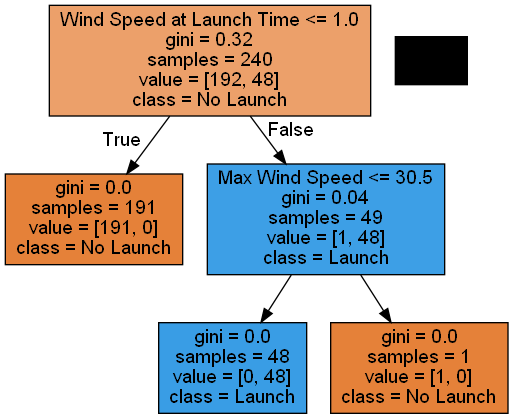

In [145]:
# This function takes a machine learning model and visualizes it.
tree_graph_to_png(tree=tree_model, feature_names=X.columns.values,class_names=['No Launch','Launch'], png_file_to_save='decision-tree.png')

In [146]:
rocket_data[(rocket_data['Wind Speed at Launch Time'] > 1) & (rocket_data['Max Wind Speed'] > 30.5)]

,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition
292,0,86.0,70.0,75.02,74.0,87.0,70.0,79.0,0.28,0.15,4,32.0,10.0,25.0,2


In [177]:
#testing the model with the data that was not in dataset before{a real workd data}
#['Crewed or Uncrewed', 'High Temp', 'Low Temp', 'Ave Temp',
#        'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp',
#        'Hist Ave Temp', 'Precipitation at Launch Time',
#        'Hist Ave Precipitation', 'Wind Direction', 'Max Wind Speed',
#        'Visibility', 'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
#        'Hist Ave Visibility', 'Condition']
#storing the model
import pickle
with open ('model_pickle','wb') as f:
    pickle.dump(tree_model,f)
with open ('model_pickle','rb') as f:
    mp=pickle.load(f)
    
rocket_data = [ 1.  , 75.  , 68.  , 71.  ,  0.  , 75.  , 55.  , 65.  ,  0.  , 0.08,  0.  , 16.  , 15.  ,  0.  ,  0. ]

mp.predict([rocket_data])

c:\Users\Ernest\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['N'], dtype=object)

In [186]:
#Storing the model
import joblib
joblib.dump(tree_model,'mlproj_joblib')

mj=joblib.load('mlproj_joblib')
mj.predict([rocket_data])

c:\Users\Ernest\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['N'], dtype=object)